11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8302 - loss: 0.5641 - val_accuracy: 0.9578 - val_loss: 0.1401
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9617 - loss: 0.1237 - val_accuracy: 0.9705 - val_loss: 0.0983
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9747 - loss: 0.0834 - val_accuracy: 0.9746 - val_loss: 0.0872
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9791 - loss: 0.0644 - val_accuracy: 0.9737 - val_loss: 0.0912
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9816 - loss: 0.0550 - val_accuracy: 0.9761 - val_loss: 0.0880
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9843 - loss: 0.0464 - val_accuracy: 0.9782 - val_loss: 0.0830
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9879 - loss: 0.0369 - val_accuracy: 0.9783 - val_loss: 0.0809
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9876 - loss: 0.0374 - val_accu

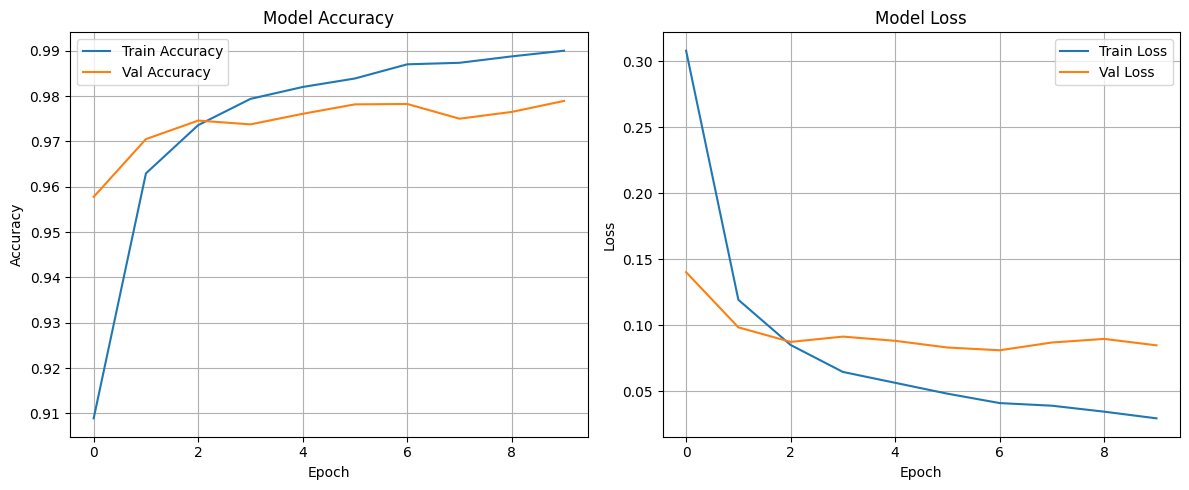

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 2: Build the deep neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Input
    Dense(512, activation='relu'),         # Hidden layer 1
    Dropout(0.2),
    Dense(256, activation='relu'),         # Hidden layer 2
    Dropout(0.2),
    Dense(128, activation='relu'),         # Hidden layer 3
    Dense(10, activation='softmax')        # Output (10 classes)
])

# Step 3: Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
history = model.fit(
    x_train,
    y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Step 5: Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 6: Plot training history
def plot_history(hist):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig("mnist_training_history.png")
    plt.show()

plot_history(history)
